In [39]:
import pandas as pd
import numpy as np
import datetime as dt
import datetime, pytz
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
pd.set_option("display.max_rows",2000)
pd.set_option("display.max_columns",50)


In [40]:
df=pd.read_csv('/content/predictive_maintenance.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [42]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [43]:
df.shape

(10000, 10)

In [44]:
df=df.drop(['UDI','Product ID'],axis=1)
df


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


In [45]:
df['nf']=df['Tool wear [min]'] * df['Torque [Nm]']
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,nf
0,M,298.1,308.6,1551,42.8,0,0,No Failure,0.0
1,L,298.2,308.7,1408,46.3,3,0,No Failure,138.9
2,L,298.1,308.5,1498,49.4,5,0,No Failure,247.0
3,L,298.2,308.6,1433,39.5,7,0,No Failure,276.5
4,L,298.2,308.7,1408,40.0,9,0,No Failure,360.0
...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure,413.0
9996,H,298.9,308.4,1632,31.8,17,0,No Failure,540.6
9997,M,299.0,308.6,1645,33.4,22,0,No Failure,734.8
9998,H,299.0,308.7,1408,48.5,25,0,No Failure,1212.5


In [46]:
## for class imbalace check
import pandas as pd
df.value_counts('Type')

,count
Type,
L,6000
M,2997
H,1003


<Axes: xlabel='Target', ylabel='count'>

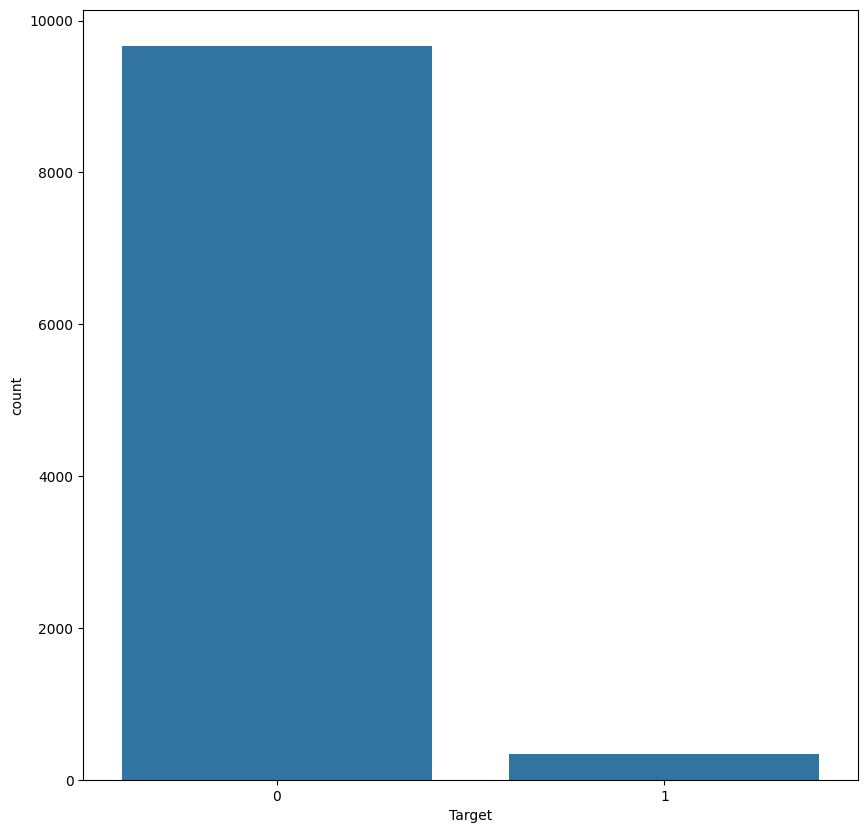

In [47]:
plt.figure (figsize=(10,10))
sns.countplot(data=df,x='Target')

<Axes: xlabel='Failure Type', ylabel='count'>

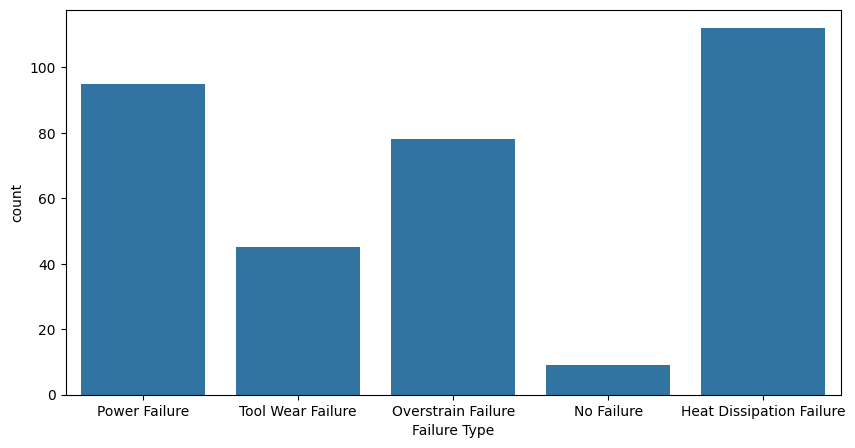

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['Target']==1],x='Failure Type')

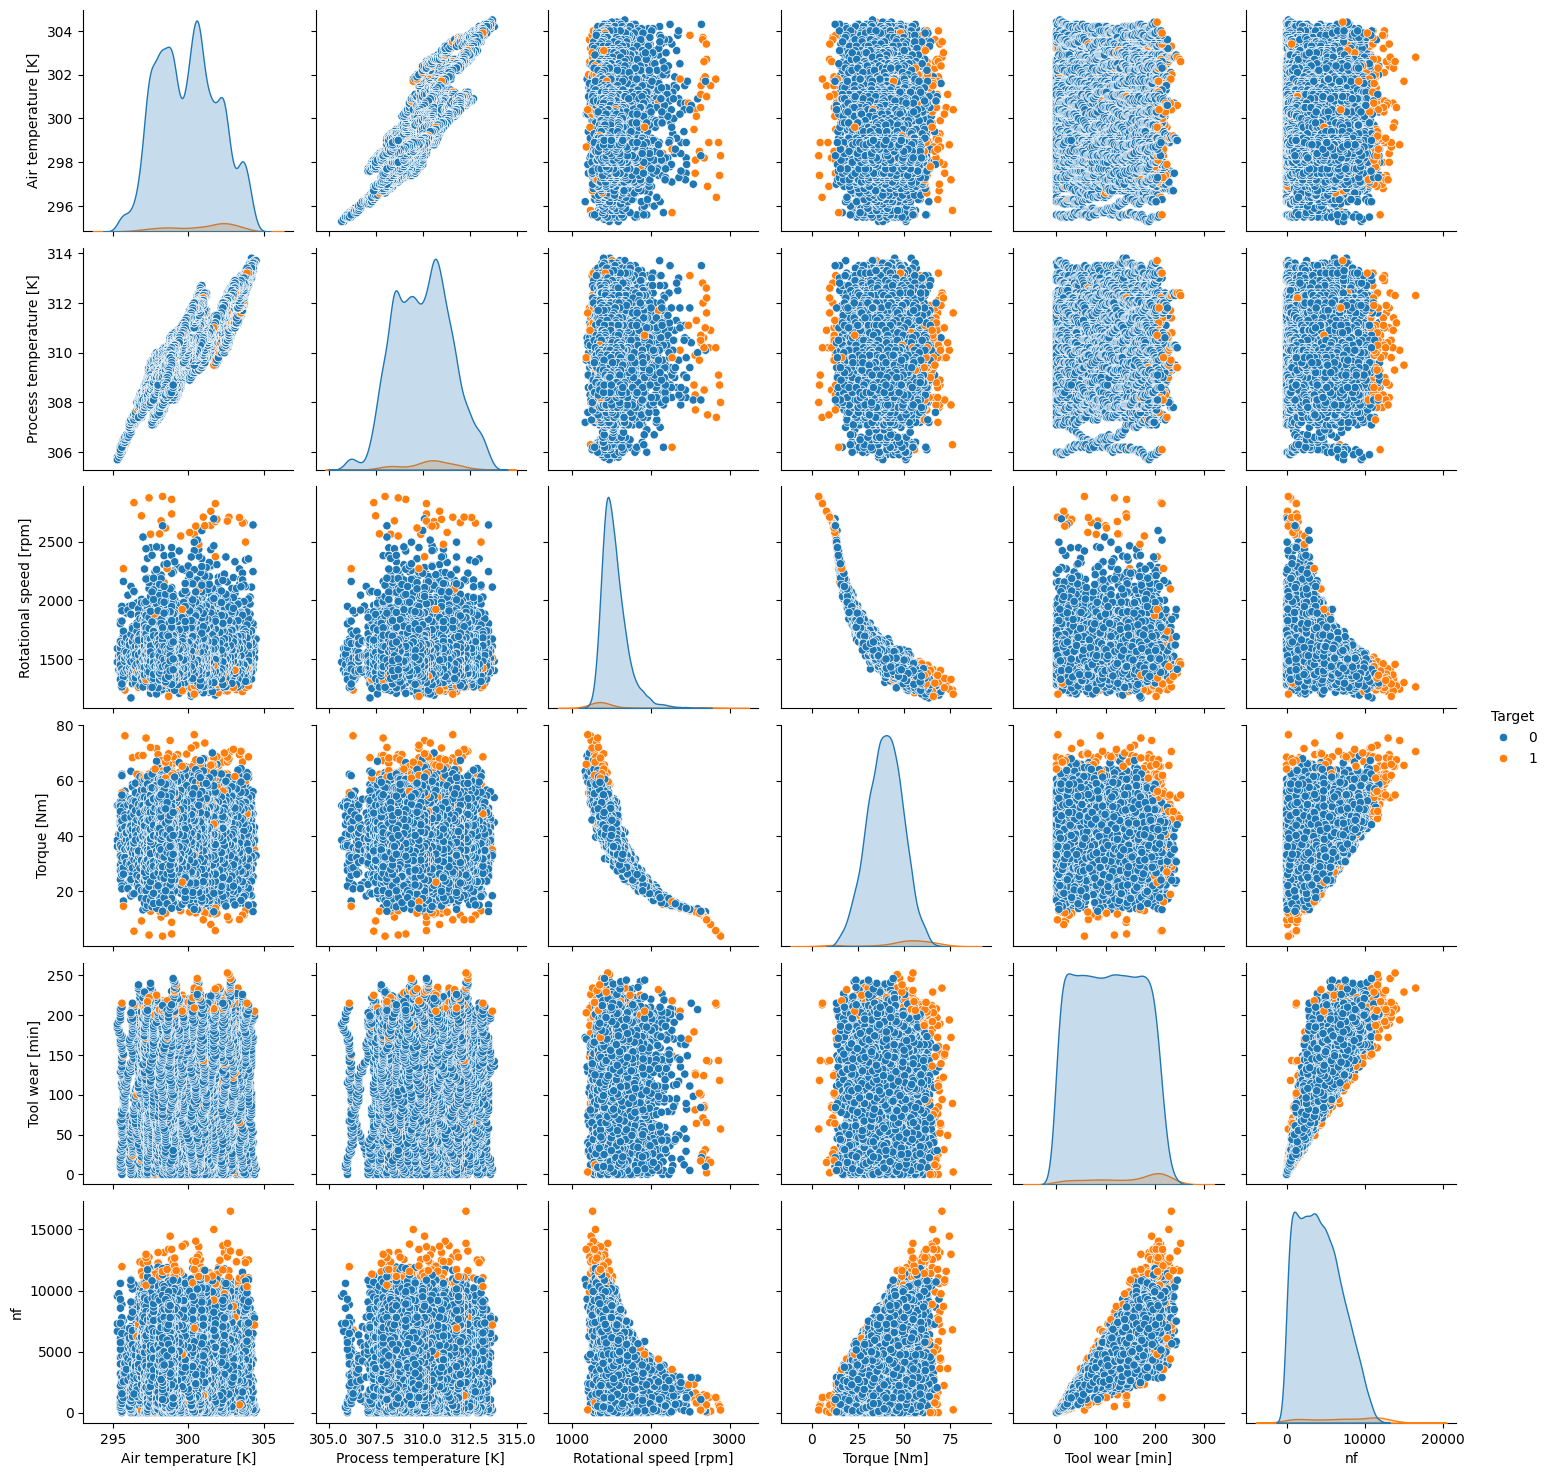

In [49]:
sns.pairplot(df,hue='Target')

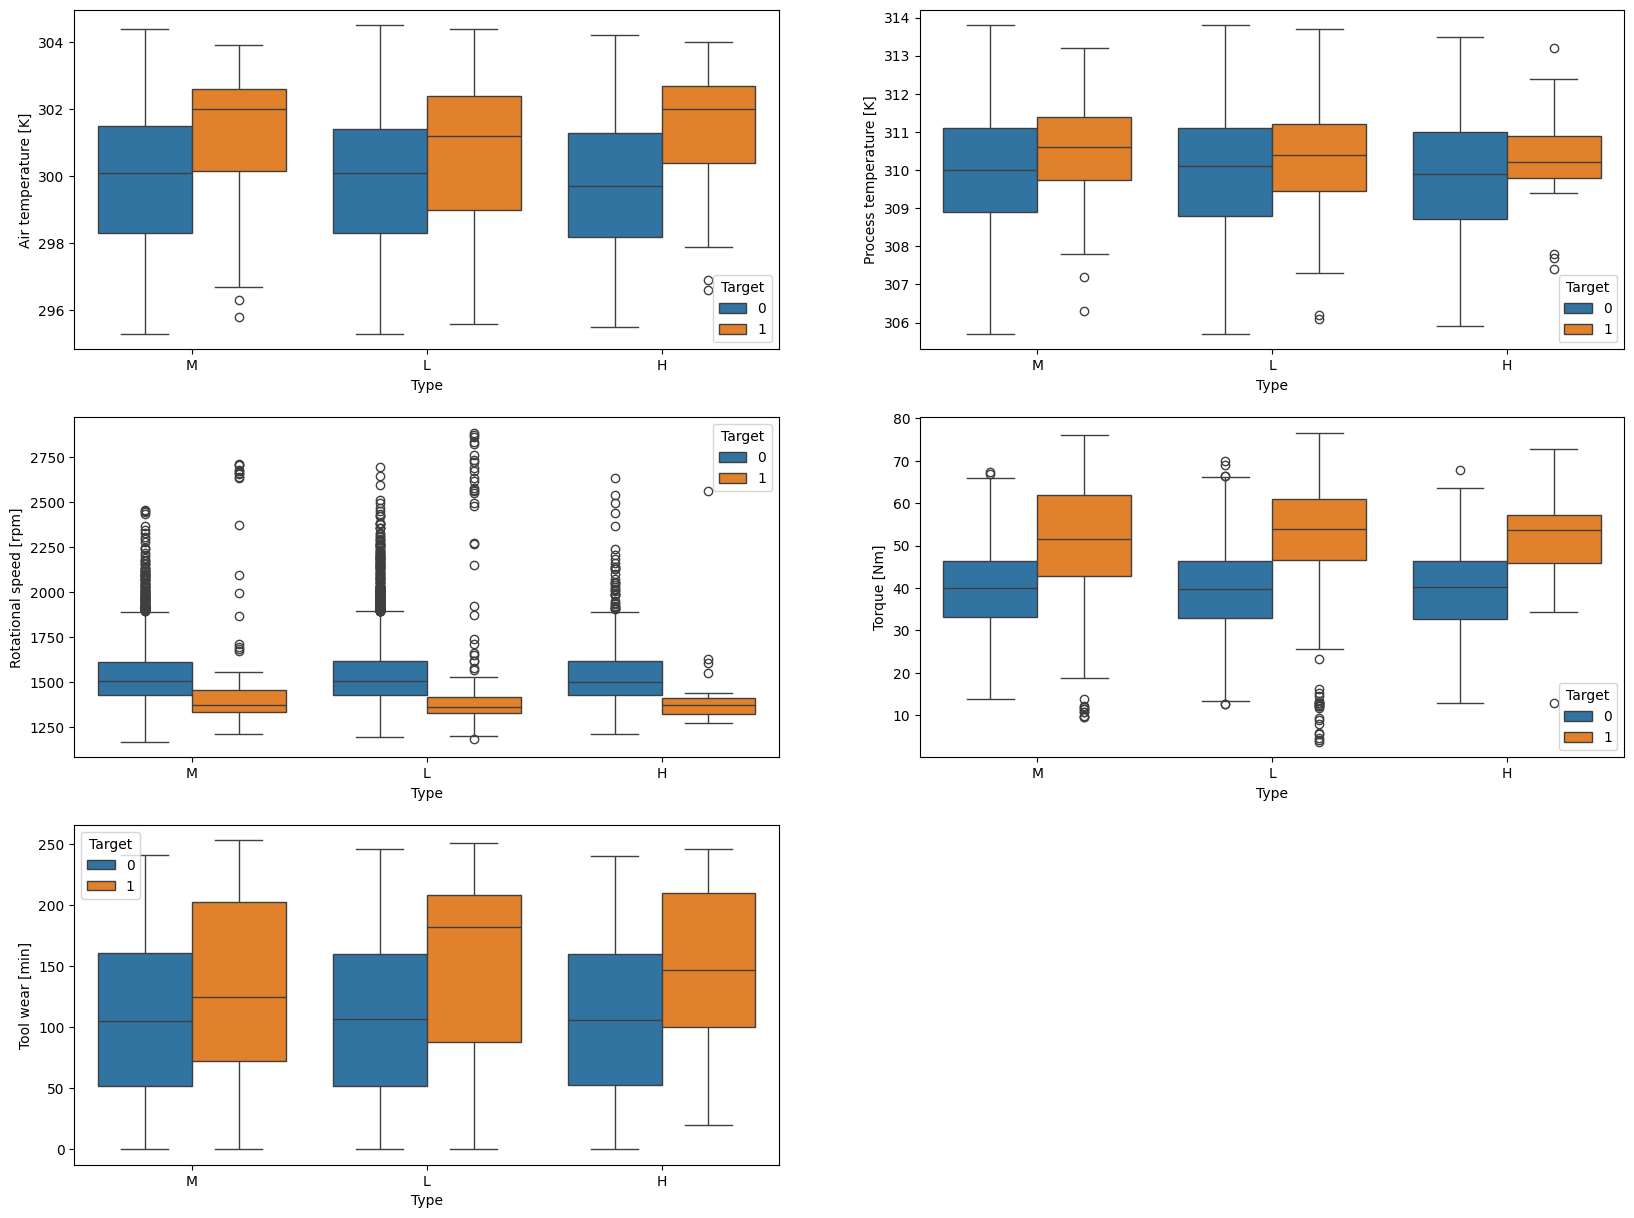

In [50]:
plt.figure(figsize = (20,15))
m=1
for i in ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'] :
    plt.subplot(3,2,m)
    sns.boxplot(data=df,y=i,x="Type",hue="Target")
    m+=1

In [51]:
import plotly.express as px

fig = px.scatter_3d(df, x='Tool wear [min]', y='Torque [Nm]', z='Rotational speed [rpm]',
              color='Target')
fig.show()

In [52]:
df['Type']=df['Type'].replace('L',0)
df['Type']=df['Type'].replace('M',1)
df['Type']=df['Type'].replace('H',2)
df


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,nf
0,1,298.1,308.6,1551,42.8,0,0,No Failure,0.0
1,0,298.2,308.7,1408,46.3,3,0,No Failure,138.9
2,0,298.1,308.5,1498,49.4,5,0,No Failure,247.0
3,0,298.2,308.6,1433,39.5,7,0,No Failure,276.5
4,0,298.2,308.7,1408,40.0,9,0,No Failure,360.0
...,...,...,...,...,...,...,...,...,...
9995,1,298.8,308.4,1604,29.5,14,0,No Failure,413.0
9996,2,298.9,308.4,1632,31.8,17,0,No Failure,540.6
9997,1,299.0,308.6,1645,33.4,22,0,No Failure,734.8
9998,2,299.0,308.7,1408,48.5,25,0,No Failure,1212.5


In [53]:
df_target=df.Target.copy()
df_failure_type=df['Failure Type'].copy()
df.drop(['Failure Type','Target'],axis=1)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],nf
0,1,298.1,308.6,1551,42.8,0,0.0
1,0,298.2,308.7,1408,46.3,3,138.9
2,0,298.1,308.5,1498,49.4,5,247.0
3,0,298.2,308.6,1433,39.5,7,276.5
4,0,298.2,308.7,1408,40.0,9,360.0
...,...,...,...,...,...,...,...
9995,1,298.8,308.4,1604,29.5,14,413.0
9996,2,298.9,308.4,1632,31.8,17,540.6
9997,1,299.0,308.6,1645,33.4,22,734.8
9998,2,299.0,308.7,1408,48.5,25,1212.5


In [54]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Failure Type','Target'],axis=1),
                                                    df['Target'], test_size=0.3, random_state=42)


In [55]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(7000, 7)
(3000, 7)
(7000,)
(3000,)


In [65]:
import time

from sklearn.metrics import recall_score,classification_report, recall_score
classifier=[]
imported_as=[]

#LGBM
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()
classifier.append('LightGBM')
imported_as.append('lgbm')

#MultiLayerPerceptron
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
classifier.append('Multi Layer Perceptron')
imported_as.append('mlp')

#Bagging
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
classifier.append('Bagging')
imported_as.append('bc')

#GBC
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
classifier.append('Gradient Boosting')
imported_as.append('gbc')

#ADA
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
classifier.append('Ada Boost')
imported_as.append('ada')

#XGB
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier()
classifier.append('XG Boost')
imported_as.append('xgb')

In [66]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
classifier.append('Logistic Regression')
imported_as.append('lr')

#RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
classifier.append('Random Forest')
imported_as.append('rfc')

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
classifier.append('k Nearest Neighbours')
imported_as.append('knn')

#SVM
from sklearn.svm import SVC
svc = SVC()
classifier.append('Support Vector Machine')
imported_as.append('svc')

In [67]:
#Grid
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000,2000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
classifier.append('SVM tuning grid')
imported_as.append('grid')

#STcaking
from sklearn.ensemble import StackingClassifier
estimators=[('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
            ('svr',SVC(random_state=42))]
stc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
classifier.append('Stacked (RFR & SVM)')
imported_as.append('stc')

classifiers = pd.DataFrame({'Classifier':classifier,'Imported as':imported_as})
print('All Models Imported\nModels stored in dataframe called classifiers')

All Models Imported
Models stored in dataframe called classifiers


In [68]:
class Modelling:
    def __init__(self, X_train, Y_train, X_test, Y_test, models):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test
        self.models = models

    def fit(self):
        model_acc = []
        model_time= []
        for i in self.models:
            start=time.time()
            if i == 'knn':
                accuracy = []
                for j in range(1,200):
                    kn = KNeighborsClassifier(n_neighbors=j)
                    kn.fit(self.X_train,self.Y_train)
                    predK = kn.predict(self.X_test)
                    accuracy.append([accuracy_score(self.Y_test,predK),j])
                temp = accuracy[0]
                for m in accuracy:
                    if temp[0] < m[0]:
                        temp=m
                i = KNeighborsClassifier(n_neighbors=temp[1])
            i.fit(self.X_train,self.Y_train)
            model_acc.append(accuracy_score(self.Y_test,i.predict(self.X_test)))
            stop=time.time()
            model_time.append((stop-start))
            print(i,'has been fit')
        self.models_output = pd.DataFrame({'Models':self.models,'accuracy':model_acc,'Runtime (s)':model_time})

    def results(self):
        models=self.models_output
        models = models.sort_values(by=['accuracy','Runtime (s)'],ascending=[False,True]).reset_index().drop('index',axis=1)
        self.best = models['Models'][0]
        models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
        models['accuracy']=models['accuracy'].round(5)*100
        self.models_output_cleaned=models
        return(models)

    def best_model(self,type):
        if type=='model':
            return(self.best)
        elif type=='name':
            return(self.models_output_cleaned['Models'][0])

    def best_model_recall(self):
        return(self.models_output_cleaned['accuracy'][0])

    def best_model_runtime(self):
        return(round(self.models_output_cleaned['Runtime (s)'][0],3))

    def best_model_predict(self,X_test):
        return(self.best.predict(X_test))

    def best_model_clmatrix(self):
        return(classification_report(self.Y_test,self.best.predict(self.X_test)))

In [69]:
models_to_test = [bc,gbc,ada,rfc,mlp,lr,knn,stc]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 9069 to 7270
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     7000 non-null   int64  
 1   Air temperature [K]      7000 non-null   float64
 2   Process temperature [K]  7000 non-null   float64
 3   Rotational speed [rpm]   7000 non-null   int64  
 4   Torque [Nm]              7000 non-null   float64
 5   Tool wear [min]          7000 non-null   int64  
 6   nf                       7000 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 437.5 KB


In [70]:
classification=Modelling(X_train,y_train,X_test,y_test,models_to_test)
classification.fit()

BaggingClassifier() has been fit
GradientBoostingClassifier() has been fit
AdaBoostClassifier() has been fit
RandomForestClassifier() has been fit
MLPClassifier() has been fit
LogisticRegression() has been fit
KNeighborsClassifier(n_neighbors=1) has been fit
StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr', SVC(random_state=42))],
                   final_estimator=LogisticRegression()) has been fit


In [71]:
classification.results()

,Models,accuracy,Runtime (s)
0,BaggingClassifier,98.900,0.395275
1,RandomForestClassifier,98.833,1.224945
2,GradientBoostingClassifier,98.800,1.682671
3,StackingClassifier,98.633,1.683749
4,AdaBoostClassifier,97.667,0.601375
5,LogisticRegression,97.400,0.104150
6,KNeighborsClassifier,96.067,0.218049
7,MLPClassifier,95.633,0.596628
